TODO LIST  
>对于缺省的`data`值，修改原数据，填上字符串"None"  
>在代码中对`data`缺失项进行插值或赋零

In [2]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
os_name = platform.system()
if(os_name == "Darwin"):
    #MacOS
    plt.rcParams['font.family'] = 'sans-serif'    
    plt.rcParams['font.sans-serif'] = ['Heiti TC']
else:
    #maybe Windows
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
data = pd.read_csv('./data.csv',index_col = 0 )
'''
如果上一行是 `data = pd.read_csv('./data.csv')`
可以在这里加一行`data.set_index('date')`达到相同效果
'''
index = data.index #有了上一行之后 这里使用data.date就会报错了
data

,卧推(kg*12x3),硬拉(kg*12x3),有氧描述,有氧时长(min),深蹲(kg*12x3),PRONE LEG CURL(kg*6x3),斜板推举(kg*12x3)
date,,,,,,,
2025/02/28,12.0,15.0,放松慢跑,15.0,NaN,NaN,NaN
2025/03/01,NaN,20.0,慢跑,30.0,NaN,NaN,NaN
2025/03/02,20.0,NaN,慢跑,17.0,30.0,NaN,NaN
2025/03/04,20.0,30.0,慢跑,20.0,NaN,NaN,NaN
2025/03/05,NaN,30.0,慢跑,21.0,30.0,NaN,NaN
2025/03/10,NaN,30.0,中速跑,22.0,NaN,30.0,NaN
2025/03/12,NaN,30.0,NaN,NaN,NaN,NaN,25.0
2025/03/17,NaN,40.0,慢跑,24.0,NaN,NaN,30.0


In [3]:
def myPlot(x, y, _title, _ylabel):
    plt.scatter(x, y)
    plt.title(_title)
    plt.ylabel(_ylabel)
    for i in range(len(index)):
        plt.annotate(str(y.iloc[i]), (index[i], y.iloc[i] + 0.2), ha='center')
    plt.show()

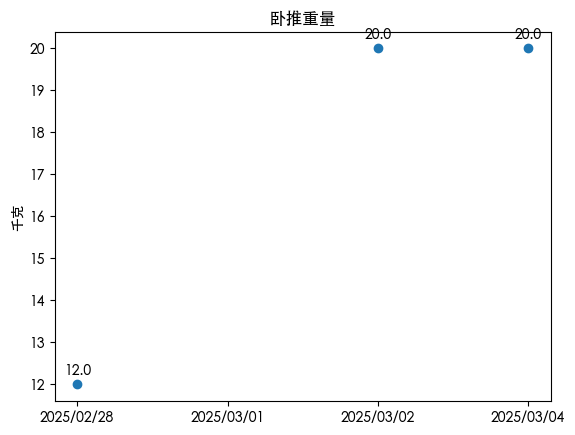

In [4]:
myPlot(index, data.iloc[:,0], "卧推重量", "千克")

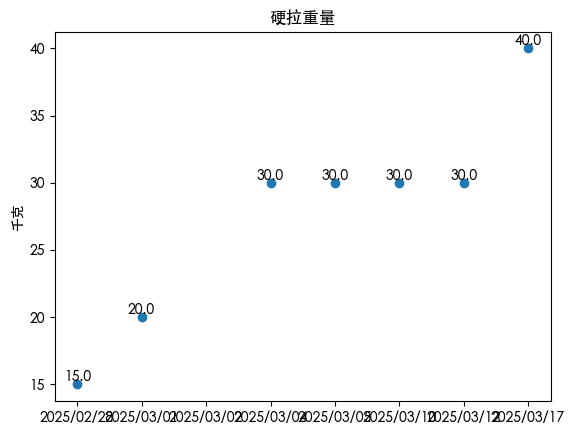

In [5]:
myPlot(index, data.iloc[:,1], "硬拉重量", "千克")

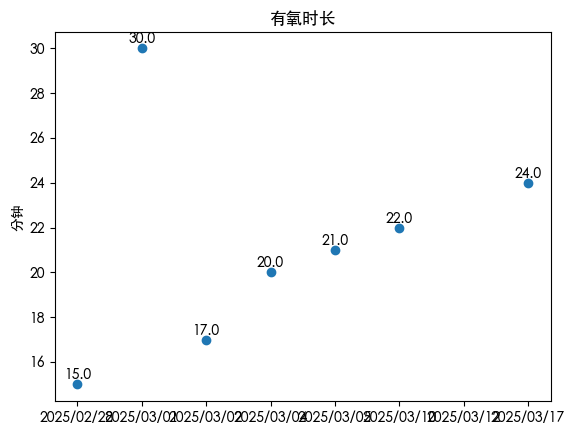

In [6]:
myPlot(index, data.iloc[:,3], "有氧时长", "分钟")

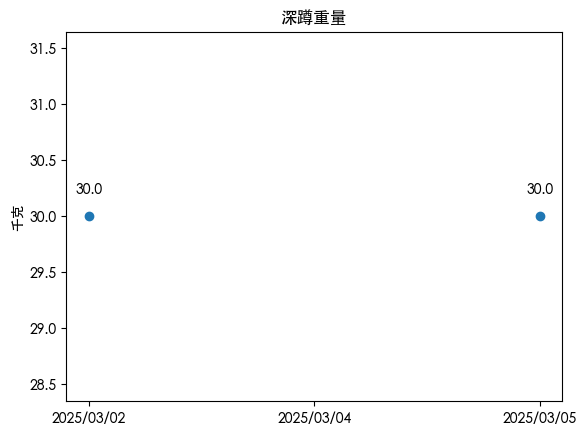

In [7]:
myPlot(index, data.iloc[:,4], "深蹲重量", "千克")

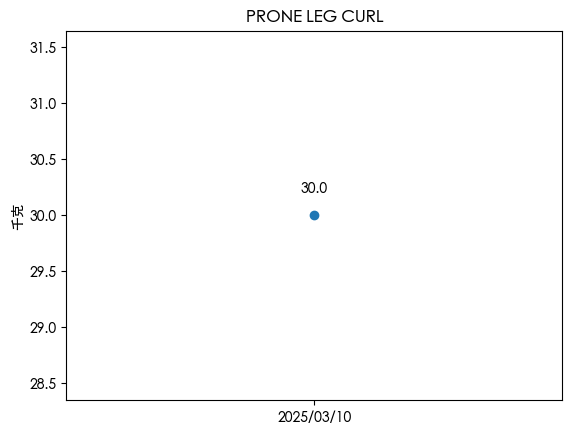

In [8]:
myPlot(index, data.iloc[:,5], "PRONE LEG CURL", "千克")

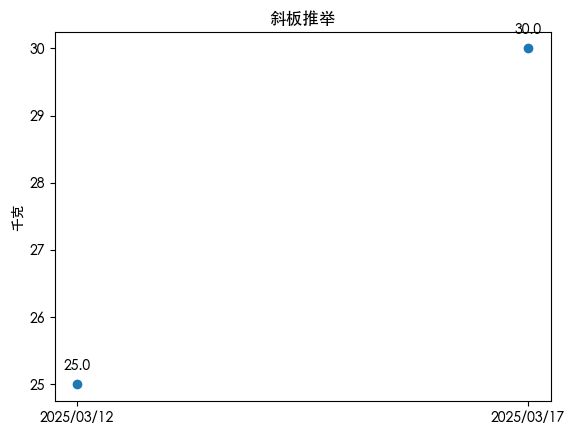

In [9]:
myPlot(index, data.iloc[:,6], "斜板推举", "千克")